<a href="https://colab.research.google.com/github/Josecp03/Google-Colab/blob/main/Casas10Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
datos=pd.read_csv('/content/sample_data/casas.csv')
datos.head()

,preciocasa,area,habitaciones,baños,pisos,carreteras,habithuespedes,sótano,calefacción,aireac,parking,porche,estadomuebles
0,13300000,7420,4,2,3,si,no,no,no,si,2,si,amueblado
1,12250000,8960,4,4,4,si,no,no,no,si,3,no,amueblado
2,12250000,9960,3,2,2,si,no,si,no,no,2,si,semi-amueblado
3,12215000,7500,4,2,2,si,no,si,no,si,3,si,amueblado
4,11410000,7420,4,1,2,si,si,si,no,si,2,no,amueblado


In [ ]:
datos.shape[0] #filas

545

In [ ]:
datos.shape[1]#columnas

13

In [ ]:
datos.shape

(545, 13)

In [ ]:
#tipos de las columnas
datos.dtypes

,0
preciocasa,int64
area,int64
habitaciones,int64
baños,int64
pisos,int64
carreteras,object
habithuespedes,object
sótano,object
calefacción,object
aireac,object


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   preciocasa      545 non-null    int64 
 1   area            545 non-null    int64 
 2   habitaciones    545 non-null    int64 
 3   baños           545 non-null    int64 
 4   pisos           545 non-null    int64 
 5   carreteras      545 non-null    object
 6   habithuespedes  545 non-null    object
 7   sótano          545 non-null    object
 8   calefacción     545 non-null    object
 9   aireac          545 non-null    object
 10  parking         545 non-null    int64 
 11  porche          545 non-null    object
 12  estadomuebles   545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
datos.describe()

,preciocasa,area,habitaciones,baños,pisos,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
tipos=datos.dtypes
listacat=[]
listanum=[]
for i in tipos.index:
  if(tipos[i]=='object'):
    listacat.append(i)
  else:
    listanum.append(i)


In [ ]:
listacat

['carreteras',
 'habithuespedes',
 'sótano',
 'calefacción',
 'aireac',
 'porche',
 'estadomuebles']

In [ ]:
listanum

['preciocasa', 'area', 'habitaciones', 'baños', 'pisos', 'parking']

In [ ]:
datos[listanum]

,preciocasa,area,habitaciones,baños,pisos,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [ ]:
datos.nunique()

,0
preciocasa,219
area,284
habitaciones,6
baños,4
pisos,4
carreteras,2
habithuespedes,2
sótano,2
calefacción,2
aireac,2


**EDA**

In [ ]:
unicos=datos['preciocasa'].unique()

(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000., 14000000.]),
 [Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2'),
  Text(14000000.0, 0, '1.4')])

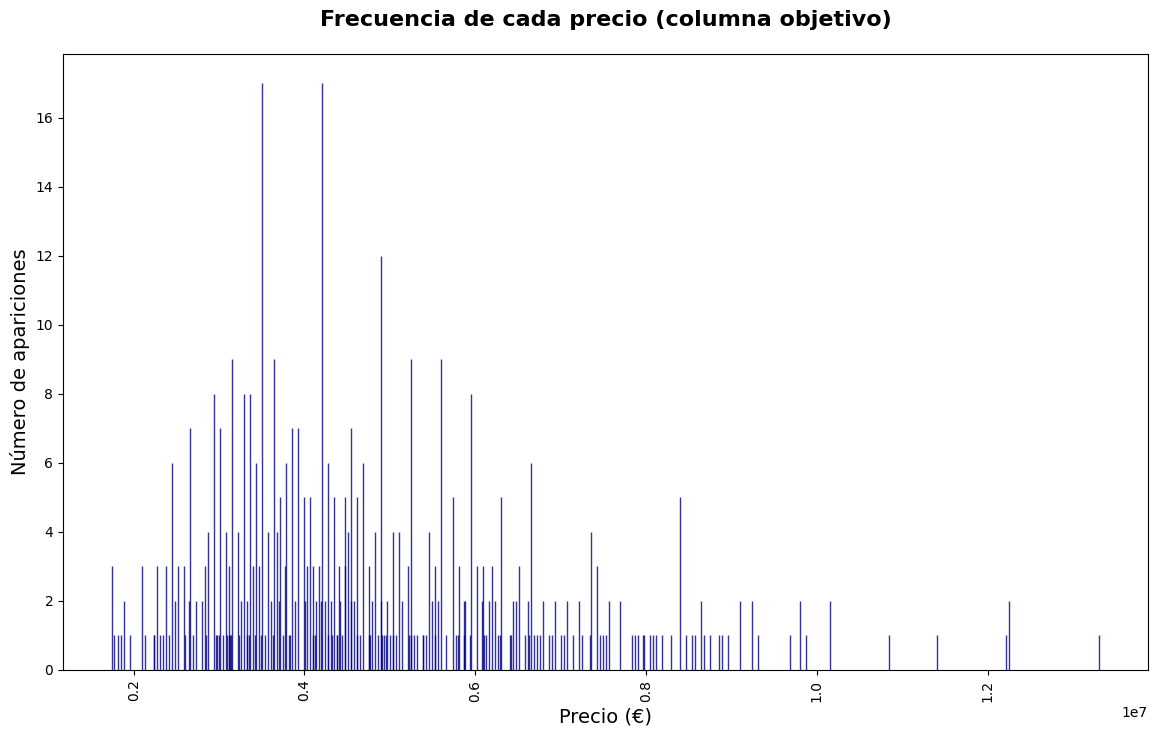

In [ ]:
#histograma con los valores de precio
# Contar frecuencias
unicos, conteos = np.unique(datos['preciocasa'], return_counts=True)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(unicos, conteos, color='skyblue', edgecolor='navy', alpha=0.8)

# Personalización
plt.title('Frecuencia de cada precio (columna objetivo)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Precio (€)', fontsize=14)
plt.ylabel('Número de apariciones', fontsize=14)
plt.xticks(rotation=90)

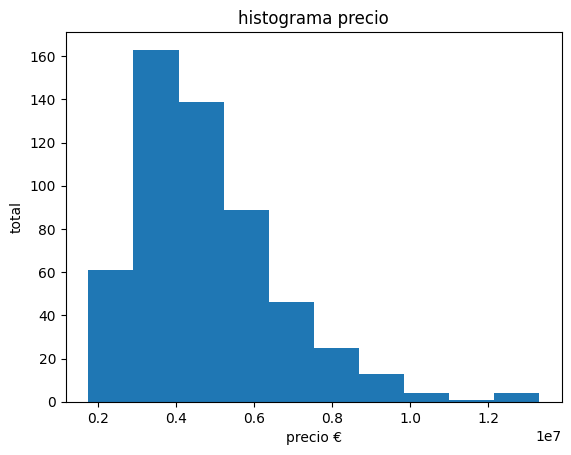

In [ ]:
#histograma precio
plt.hist(datos['preciocasa'])
plt.xlabel('precio €')
plt.ylabel('total')
plt.title('histograma precio')
plt.show()

<Axes: xlabel='area'>

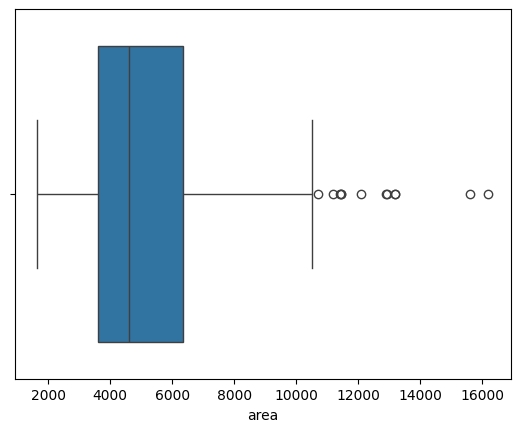

In [ ]:
#boxplot para área
sns.boxplot(x=datos['area'])

In [ ]:
datos[listanum].corr()

,preciocasa,area,habitaciones,baños,pisos,parking
preciocasa,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
habitaciones,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
baños,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
pisos,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

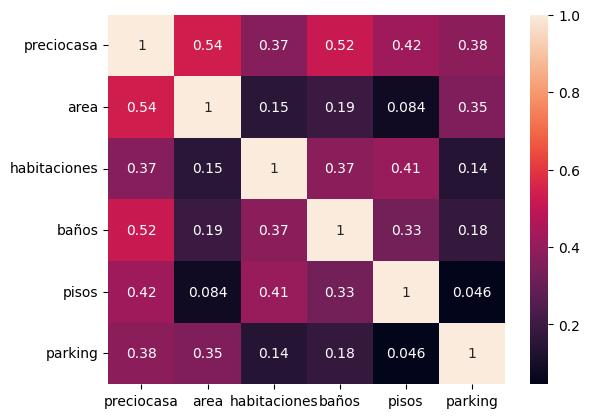

In [ ]:
#heatmap
sns.heatmap(datos[listanum].corr(), annot=True)

Text(0, 0.5, 'precio')

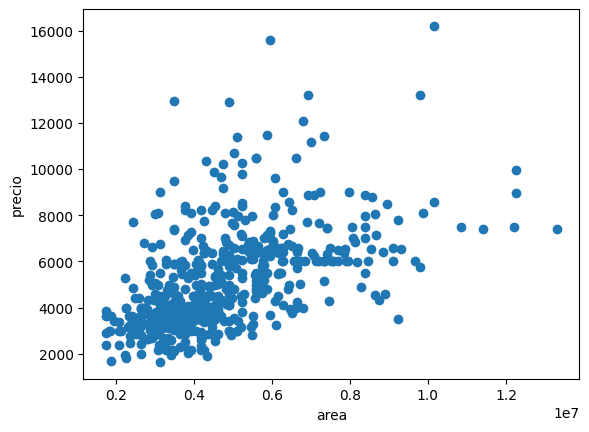

In [ ]:
#Diagramas de dispersion
plt.scatter(datos['preciocasa'],datos['area'])
plt.xlabel('area')
plt.ylabel('precio')

Text(0, 0.5, 'habitaciones')

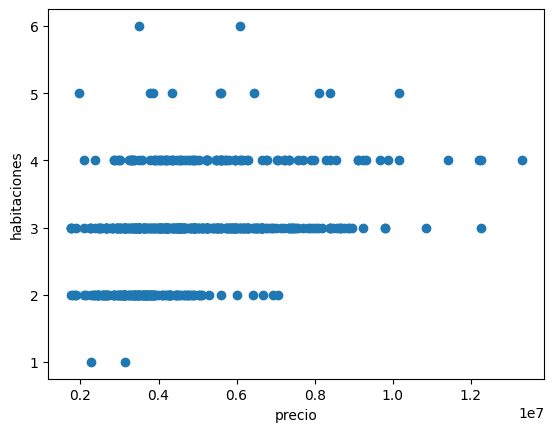

In [ ]:
plt.scatter(datos['preciocasa'],datos['habitaciones'])
plt.xlabel('precio')
plt.ylabel('habitaciones')

In [ ]:
frecuencia_parking=datos.groupby('parking').size()
frecuencia_parking

,0
parking,
0,299
1,126
2,108
3,12


<Axes: xlabel='parking'>

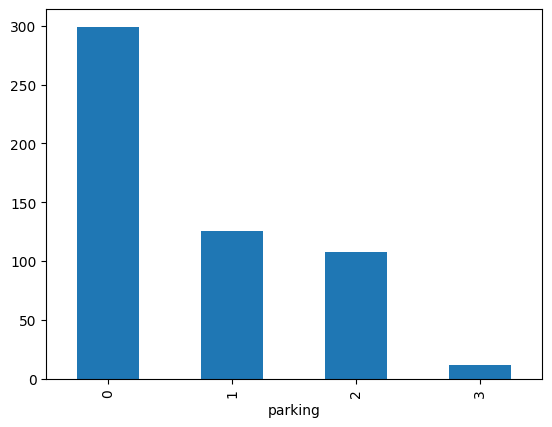

In [ ]:
frecuencia_parking.plot(kind='bar')

In [ ]:
frecuencia_aire=datos.groupby('aireac').size()
frecuencia_aire

,0
aireac,
no,373
si,172


<Axes: xlabel='aireac'>

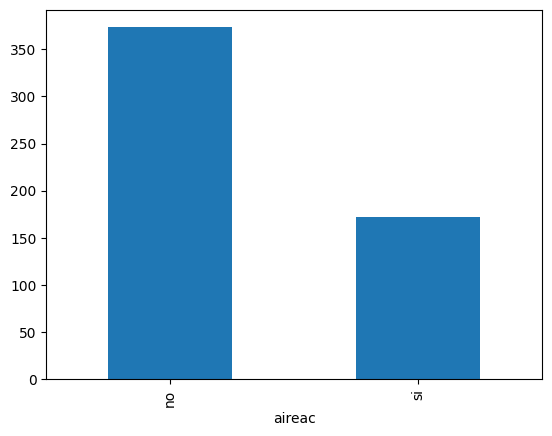

In [ ]:
frecuencia_aire.plot(kind='bar')

**Preprocesamiento**

In [ ]:
datos[datos.duplicated]

,preciocasa,area,habitaciones,baños,pisos,carreteras,habithuespedes,sótano,calefacción,aireac,parking,porche,estadomuebles


In [ ]:
datos.isnull().sum()

,0
preciocasa,0
area,0
habitaciones,0
baños,0
pisos,0
carreteras,0
habithuespedes,0
sótano,0
calefacción,0
aireac,0


In [ ]:
tipos=datos.dtypes
listacat=[]
listanum=[]
for i in tipos.index:
  if(tipos[i]=='object'):
    listacat.append(i)
  else:
    listanum.append(i)







In [ ]:
#OneHotEncoding
datos_cat=pd.DataFrame(datos[listacat])
datos_cat

,carreteras,habithuespedes,sótano,calefacción,aireac,porche,estadomuebles
0,si,no,no,no,si,si,amueblado
1,si,no,no,no,si,no,amueblado
2,si,no,si,no,no,si,semi-amueblado
3,si,no,si,no,si,si,amueblado
4,si,si,si,no,si,no,amueblado
...,...,...,...,...,...,...,...
540,si,no,si,no,no,no,no-amueblado
541,no,no,no,no,no,no,semi-amueblado
542,si,no,no,no,no,no,no-amueblado
543,no,no,no,no,no,no,amueblado


In [ ]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
datos_one=pd.DataFrame(datos[listacat])
codificador=OneHotEncoder()
codificacion=codificador.fit_transform(datos_one)

# Mostrar los nombres de las categorías del codificador
codificador.get_feature_names_out()

# Generamos el dataframe con las categorias nuevas
nuevascol=codificador.get_feature_names_out()
print(nuevascol)
# Creamos el DataFrame con los datos ya categorizados
nuevosdatos=pd.DataFrame(codificacion.toarray(), columns=nuevascol)
nuevosdatos

['carreteras_no' 'carreteras_si' 'habithuespedes_no' 'habithuespedes_si'
 'sótano_no' 'sótano_si' 'calefacción_no' 'calefacción_si' 'aireac_no'
 'aireac_si' 'porche_no' 'porche_si' 'estadomuebles_amueblado'
 'estadomuebles_no-amueblado' 'estadomuebles_semi-amueblado']


,carreteras_no,carreteras_si,habithuespedes_no,habithuespedes_si,sótano_no,sótano_si,calefacción_no,calefacción_si,aireac_no,aireac_si,porche_no,porche_si,estadomuebles_amueblado,estadomuebles_no-amueblado,estadomuebles_semi-amueblado
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Añadimos el resto de columnas,y creamos el nuevo df, datosnue
nuevodf=datos[listanum]
datosnue=pd.concat([datos[listanum], nuevosdatos], axis=1) #Concatena las columnas
datosnue


,preciocasa,area,habitaciones,baños,pisos,parking,carreteras_no,carreteras_si,habithuespedes_no,habithuespedes_si,...,sótano_si,calefacción_no,calefacción_si,aireac_no,aireac_si,porche_no,porche_si,estadomuebles_amueblado,estadomuebles_no-amueblado,estadomuebles_semi-amueblado
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
541,1767150,2400,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
543,1750000,2910,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Detectar Outliers

In [ ]:
Q1 = np.quantile(datosnue['area'],0.25)
Q3 = np.quantile(datosnue['area'],0.75)
RIQ = Q3 - Q1
k = 3
xL = Q1 - k * RIQ
xU = Q3 + k * RIQ
n=0
# RECORREMOS LOS DATOS Y COMPROBAMOS
for i in  range(len(datosnue['area'])):
        if datosnue['area'][i] < xL  or datosnue['area'][i]>xU:
          print(f" El dato[{i}]={datosnue['area'][i]} es un outlier")
          n=n+1
print("Encontrados:",n)

 El dato[7]=16200 es un outlier
 El dato[125]=15600 es un outlier
Encontrados: 2


In [ ]:
# Borrar las filas con outliers
for i in  range(len(datosnue['area'])):
        if datosnue['area'][i] < xL  or datosnue['area'][i]>xU:
          datosnue.drop(i, inplace=True)
datosnue


,preciocasa,area,habitaciones,baños,pisos,parking,carreteras_no,carreteras_si,habithuespedes_no,habithuespedes_si,...,sótano_si,calefacción_no,calefacción_si,aireac_no,aireac_si,porche_no,porche_si,estadomuebles_amueblado,estadomuebles_no-amueblado,estadomuebles_semi-amueblado
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
541,1767150,2400,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
543,1750000,2910,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
datosnue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   preciocasa                    543 non-null    int64  
 1   area                          543 non-null    int64  
 2   habitaciones                  543 non-null    int64  
 3   baños                         543 non-null    int64  
 4   pisos                         543 non-null    int64  
 5   parking                       543 non-null    int64  
 6   carreteras_no                 543 non-null    float64
 7   carreteras_si                 543 non-null    float64
 8   habithuespedes_no             543 non-null    float64
 9   habithuespedes_si             543 non-null    float64
 10  sótano_no                     543 non-null    float64
 11  sótano_si                     543 non-null    float64
 12  calefacción_no                543 non-null    float64
 13  calefacció

Escalamos los datos

In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
escala=StandardScaler()
final=escala.fit_transform(datosnue)
final



array([[ 4.60137997,  1.11473169,  1.41595065, ...,  1.69663533,
        -0.69541826, -0.84435405],
       [ 4.03599079,  1.85819139,  1.41595065, ...,  1.69663533,
        -0.69541826, -0.84435405],
       [ 4.03599079,  2.34095743,  0.05272157, ..., -0.58940185,
        -0.69541826,  1.18433731],
       ...,
       [-1.61790102, -0.71977927, -1.31050751, ..., -0.58940185,
         1.43798352, -0.84435405],
       [-1.61790102, -1.06254316,  0.05272157, ...,  1.69663533,
        -0.69541826, -0.84435405],
       [-1.61790102, -0.60874309,  0.05272157, ..., -0.58940185,
         1.43798352, -0.84435405]])

In [ ]:
datosFinal=pd.DataFrame(final, columns=datosnue.columns)
datosFinal

,preciocasa,area,habitaciones,baños,pisos,parking,carreteras_no,carreteras_si,habithuespedes_no,habithuespedes_si,...,sótano_si,calefacción_no,calefacción_si,aireac_no,aireac_si,porche_no,porche_si,estadomuebles_amueblado,estadomuebles_no-amueblado,estadomuebles_semi-amueblado
0,4.601380,1.114732,1.415951,1.440365,1.375545,1.520339,-0.406492,0.406492,0.466357,-0.466357,...,-0.736623,0.219687,-0.219687,-1.474937,1.474937,-1.800608,1.800608,1.696635,-0.695418,-0.844354
1,4.035991,1.858191,1.415951,5.461540,2.528201,2.683077,-0.406492,0.406492,0.466357,-0.466357,...,-0.736623,0.219687,-0.219687,-1.474937,1.474937,0.555368,-0.555368,1.696635,-0.695418,-0.844354
2,4.035991,2.340957,0.052722,1.440365,0.222889,1.520339,-0.406492,0.406492,0.466357,-0.466357,...,1.357546,0.219687,-0.219687,0.677995,-0.677995,-1.800608,1.800608,-0.589402,-0.695418,1.184337
3,4.017144,1.153353,1.415951,1.440365,0.222889,2.683077,-0.406492,0.406492,0.466357,-0.466357,...,1.357546,0.219687,-0.219687,-1.474937,1.474937,-1.800608,1.800608,1.696635,-0.695418,-0.844354
4,3.583679,1.114732,1.415951,-0.570222,0.222889,1.520339,-0.406492,0.406492,-2.144280,2.144280,...,1.357546,0.219687,-0.219687,-1.474937,1.474937,0.555368,-0.555368,1.696635,-0.695418,-0.844354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,-1.580208,-1.019094,-1.310508,-0.570222,-0.929767,1.520339,-0.406492,0.406492,0.466357,-0.466357,...,1.357546,0.219687,-0.219687,0.677995,-0.677995,0.555368,-0.555368,-0.589402,1.437984,-0.844354
539,-1.608666,-1.308754,0.052722,-0.570222,-0.929767,-0.805137,2.460071,-2.460071,0.466357,-0.466357,...,-0.736623,0.219687,-0.219687,0.677995,-0.677995,0.555368,-0.555368,-0.589402,-0.695418,1.184337
540,-1.617901,-0.719779,-1.310508,-0.570222,-0.929767,-0.805137,-0.406492,0.406492,0.466357,-0.466357,...,-0.736623,0.219687,-0.219687,0.677995,-0.677995,0.555368,-0.555368,-0.589402,1.437984,-0.844354
541,-1.617901,-1.062543,0.052722,-0.570222,-0.929767,-0.805137,2.460071,-2.460071,0.466357,-0.466357,...,-0.736623,0.219687,-0.219687,0.677995,-0.677995,0.555368,-0.555368,1.696635,-0.695418,-0.844354
